# Resumen Artículo de Dijkstra
### - Nombre: Benites Onofre Fernando Gabriel
## - On the nature of sequential processess.
Veamos primero una comparación de dos máquinas que hacen algún trabajo, la primera una máquina no-secuencial y la otra sí es secuencial. 

En el artículo se desarrolla el ejemplo comparando dos máquinas que hace el uso de electroimanes; pero por mi parte haré la misma idea suponiendo una máquina "traga monedas" (A), en la cuál tenemos que esta sale por el camino B o C dependiendo qué se cumple de la desigualdad $y<x$ (o $x<y$, en este caso no se consideran igualdades para poder hacer alguna útil comparación entre dos valores) justo como se puede ver en la siguiente imagen:


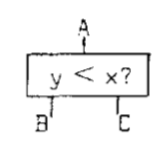

Si ahora en este sentido consideramos que tenemos más niveles, tenemos que cada nivel (en qué dirección se va moviendo la moneda), en donde necesitamos la respuesta previa para poder avanzar entre cada nivel, de esta manera podemos decir que esta no es una característica propia de un proceso secuencial.

## - Loosely Connected Processes.
Cuando dos o más procesos tienen que cooperar entre sí, ellos deben estar conectados, es decir, debe haber comunicación entre sí para "intercambiar" información.
Si dos procesos modifican una misma variable al mismo tiempo, entonces se asignará de forma independiente los nuevos valores uno después de otro sin ninguna clase de mezcla de los valores.

Supongamos dos procesos secuenciales (A y B) los cuales en algún momento ambos procesos accederán a variables en común. Cuando ambas variables asignan un nuevo valor a una misma variable, entonces la asignación  serán hechas una después de la otra, el valor final de dicha variable es atómica, que sigue la asiganación de uno de los procesos; no una mezcla. Ahora en el caso de lectura de dicha variable su valor con la asignación a la misma por parte del otro proceso, entonces el primer proceso encontrará el valor antiguo o el nuevo, pero nunca una mezcla.
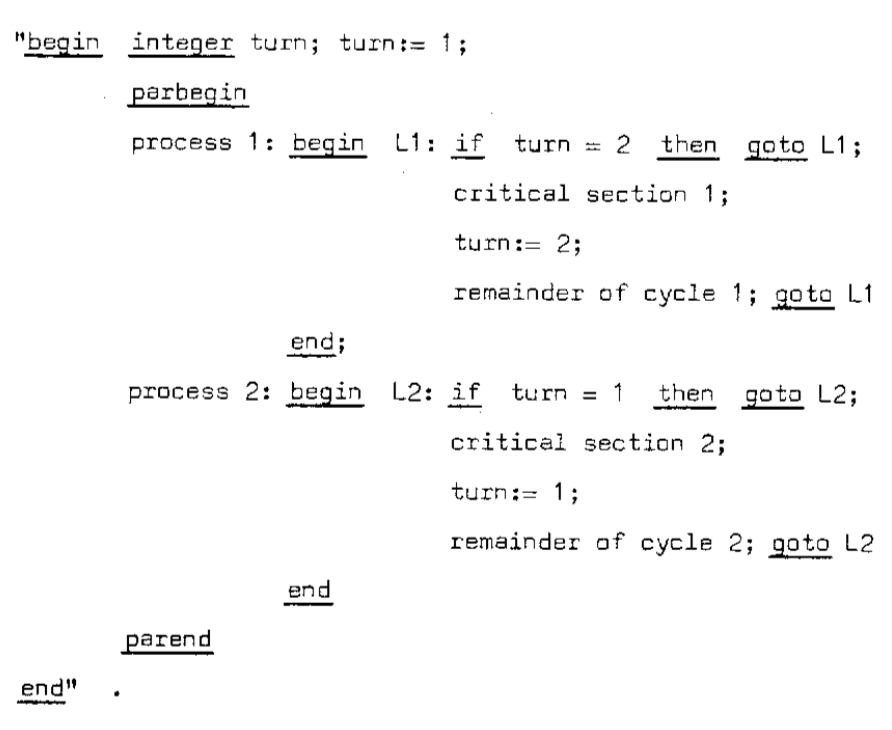 Aquí vemos un ejemplo de dos procesos que modifican el valor de una misma variable

En el anterior código vemos que en cada cíclo hay una línea de "critical secetion"; veamos su definición: 
- Sección (o región) crítica: El área de código que requiere ser protegida de accesos simultáneos donde se realiza la modificiación de datos compartidos.

Dicho esto, el código sugiere el uso de turnos para tratar de resolver los problemas que implica el acceso concurrente a una sección crítica. Siendo así podemos decir que estos procesos se turnan para poder realizar sus cambios o lecturas a la variable compartida.

Una solución alternativa para tratar la concurrencia en la zona crítica es implementando banderas, que es como se muestra a continuación en la figura:

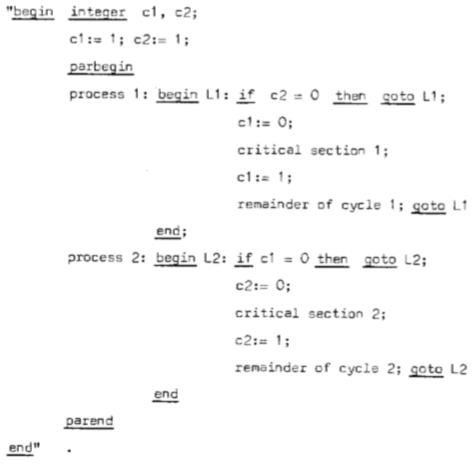
Sin embargo veamos el caso en donde podríamos tener que después de la asignación $c1=0$, pero antes de la inspección de $c2$ (ambos por proceso 1) proceso 2 realice la asignación $c2=0$, entonces ambos procesos han llegado al nivel L1 o L2 respectivamente y ambas relaciones $c1 = 0$ y $c2=0$ se hacen, teniendo así que ambos procesos esperarán una a la otra en un tiempo indeterminado, por lo cual esta solución debería ser descartada.

## - The Mutual Exclusion Problem Revisited

Como pudimos ver en la sección anterior, restringir la comuncación entre procesos es importante si se desea manejar el acceso concurrente a la sección crítica. Esto es que ningún otro proceso puede entrar a la sección crítica de otro proceso por lo cual deben esperar hasta que la ejecución de la actual sección crítica haya terminado. 

Hoy en día las computadoras cuentan por lo menos con dos maneras en las cuales el tiempo de lectura de variables compartidas (tenemos que nuestros procesos se satural modificando y verificando variables comunes todo el tiempo) pueden ser bastantes caras; doichas computadoras tienen dos distintas partes llamdas procesador y almacenamiento. 
- Procesador: Parte activa en la cual los operadores lógicos y aritméticos son ejecutados, la cuales es activa y pequeña.
- Almacenamiento: la cuál es pasiva y larga, reside en cualquier momento la información, la cual no es procesada en todo momento pero sólo los mantiene para futuras llamdas del sistema.

Los procesos en la computadora, son transportados del almacenamiento al procesador, la información en almacenmaiento puede ser cambiada por la transportación en la dirección contraria.

Los accesos indivisibles a variables compartidas son del tip "one-way information traffic", ya que un proceso puede leer o cambiar el valor de una variable, esta acción no deja que otros procesos hagan dichas tareas, por lo cual el proceso en espera puede verse afectado ante el cambio de valor a una variable compartida y así tener resultados no deseados, a continuación se mencionan algunas añternativas para poder manejar esto antes mencionado:
- Semáforos
- P- operation y V- operation

V- operation: es una operación con un argumento, la cual es una identificación de un semáforo. Su función es incrementar el valor de su argumento en 1, esta operación de aumentar debe ser una función atómica. V(S1) con S1 semáforo.

P- operation: es una operación con un argumento, la cual debe ser la identificación de un semáforo. Su función es disminui el valor de su argumento por 1 tanto que el valor sea no negativo. P(S1) con S1 semáforo.

Los semáforos usualmentes son enteros no negativos, los usaremos sólo para resolver problemas de exlusión mutua, el rango de sus valores varía de 0 y 1 comúnmente.

## - The General Semaphore

Consideremos dos procesos llamados "Producer" y "Consumer", el primer proceso es un proceso cíclico y cada iteración produce cierta información, que a su vez tiene que ser procesada por "Consumer". El proceso "Consumer" también es cíclico y en cada iteración  puede procesar la siguiente porción de información que ha sido producida por "Producer". 

La relación entre estos procesos implica un canal de comunicación "one-way" (de un sólo sentido) entre ambos en la cual las porciones de información puede ser transmitida. Supongamos que los procesos estarán conectados vía buffer con toda la capacidad que estos lo requieran, es decir, la informacion producida no necesariamente será consumida inmediatamente, pero podrán estar "encolados" en el buffer; en este sentido el buffer debe ser un medio de almacenamiento y acceso de los procesos con un almacenamiento de tipo cola, es decir "FIFO" (First In First Out) en memoria. Enlistemos algunas ventajas de usar el buffer para nuestros procesos: 
- Ayuda a igualar la velocidad entre dos dispositivos en los que se transmiten los datos. Por ejemplo, un disco duro tiene que almacenar el archivo recibido del módem. Como sabemos, la velocidad de transmisión de un módem es lenta comparada con la del disco duro. Por lo tanto, los bytes procedentes del módem se acumulan en el espacio del buffer, y cuando todos los bytes de un archivo han llegado al buffer, todos los datos se escriben en el disco duro en una sola operación.
- Ayuda a los dispositivos con diferentes tamaños de transferencia de datos a adaptarse entre sí. Ayuda a los dispositivos a manipular los datos antes de enviarlos o recibirlos. En las redes informáticas, el mensaje grande se fragmenta en pequeños fragmentos y se envía por la red. Los fragmentos se acumulan en el buffer en el extremo receptor y se vuelven a ensamblar para formar un mensaje grande completo.
- También admite la semántica de copia. Con la semántica de copia, se garantiza que la versión de los datos en el buffer es la versión de los datos en el momento de la llamada al sistema, independientemente de cualquier cambio posterior en los datos del búfer. El almacenamiento en búfer aumenta el rendimiento del dispositivo. Superpone la I/O de un trabajo con el cálculo del mismo trabajo.

Cuando "Producer" ha generado su siguiente porción de información, éste mismo debe ser almacenada en el buffer, en el caso en que "Consumer" acceda al buffer para la obtención de la información producida por "Producer", tendrá de vuelta la porción más vieja que se encuentra en el buffer, ya que recordemos que la información llega en modo de cola. Al buffer también se le conoce como "First In First On Memory". A continuación tenemos el pseudocódigo de lo discutido anteriormente: 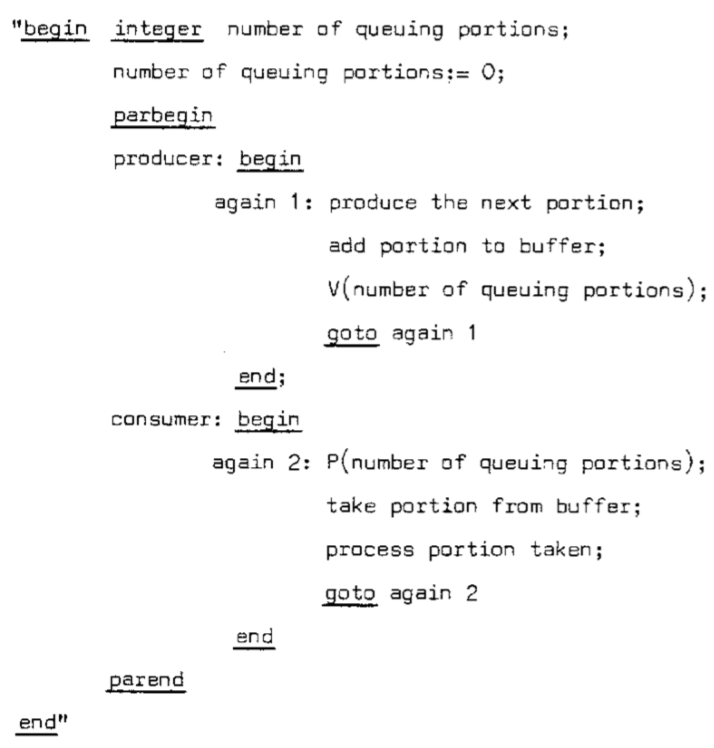

Ahora implementación de "buffer by means of chaining" no es usual que las declaraciones "add portion to buffer" and "take portion from buffer" pudieran interferir de una manera indeseable, que se excluyen entre sí. Esto puede ser atendido por un semáforo binario llamado "buffer manipulation", los cuáles son definidos como:
- 0: se está añadiendo o sacando del buffer.
- 1: no se está añadiendo ni quitando nada del buffer

Veamos a continuación el pseudocódigo de esta implementación:
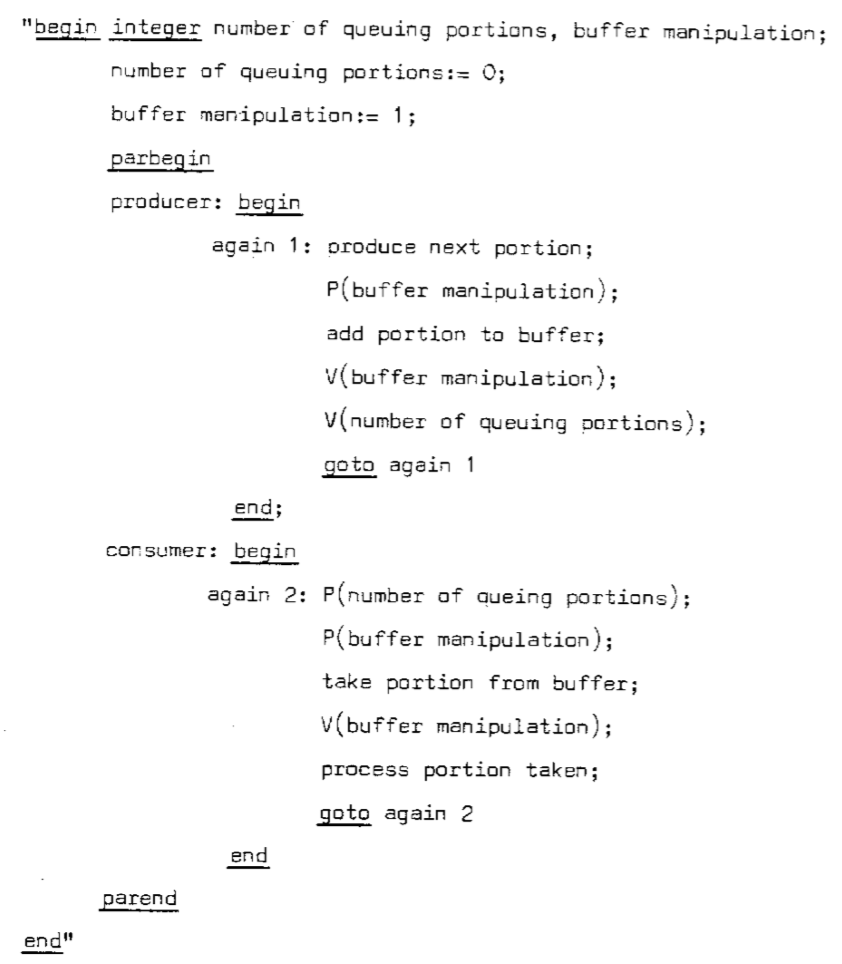

Veamos ahora la "superfluity" de semáforos generales. Primero expongamos el pseudocódigo en el cual nos basaremos para abordar el ya mencionado tema:
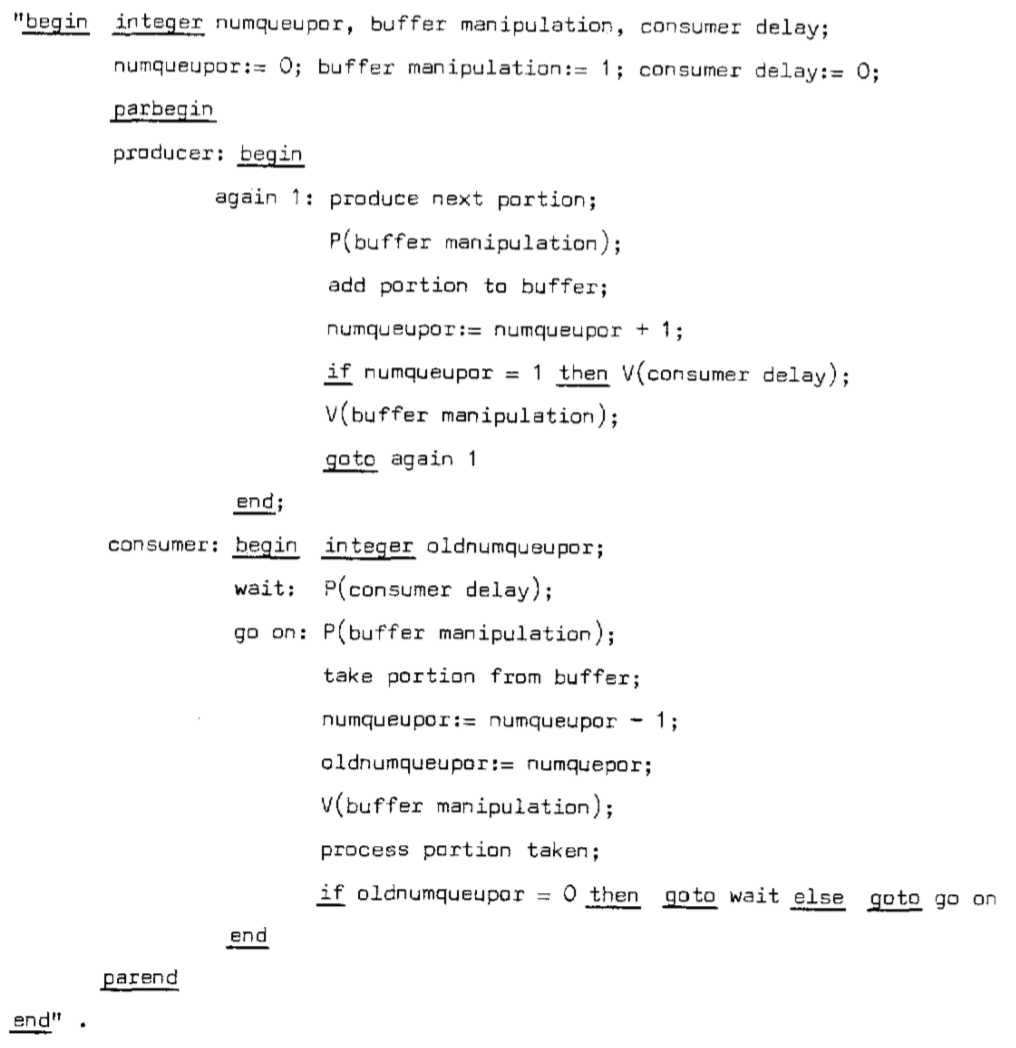
Notemos que en alguna parte del programa, tenemos ratos en los cuales el buffer está vacío. Tal periodo sólo puede ser inicializado por "Consumer" y puede ser sólo finalizado por el proceso "Producer". Cada periodo es acompañado por un P- y V- operación. 

Ahora a partir de este programa formaremos una nueva implementación conocida como "The Sleeping Barber" la cual aborda la situación del buffer vacío, en la cual esperamos que haya menos espera en las P- y V-operaciones sobre retraso de Consumer, no cuando el buffer se vacíe por un periodo corto de tiempo, pero es llenado de nuevo haciendo retrasar innecesariamente a Consumer.
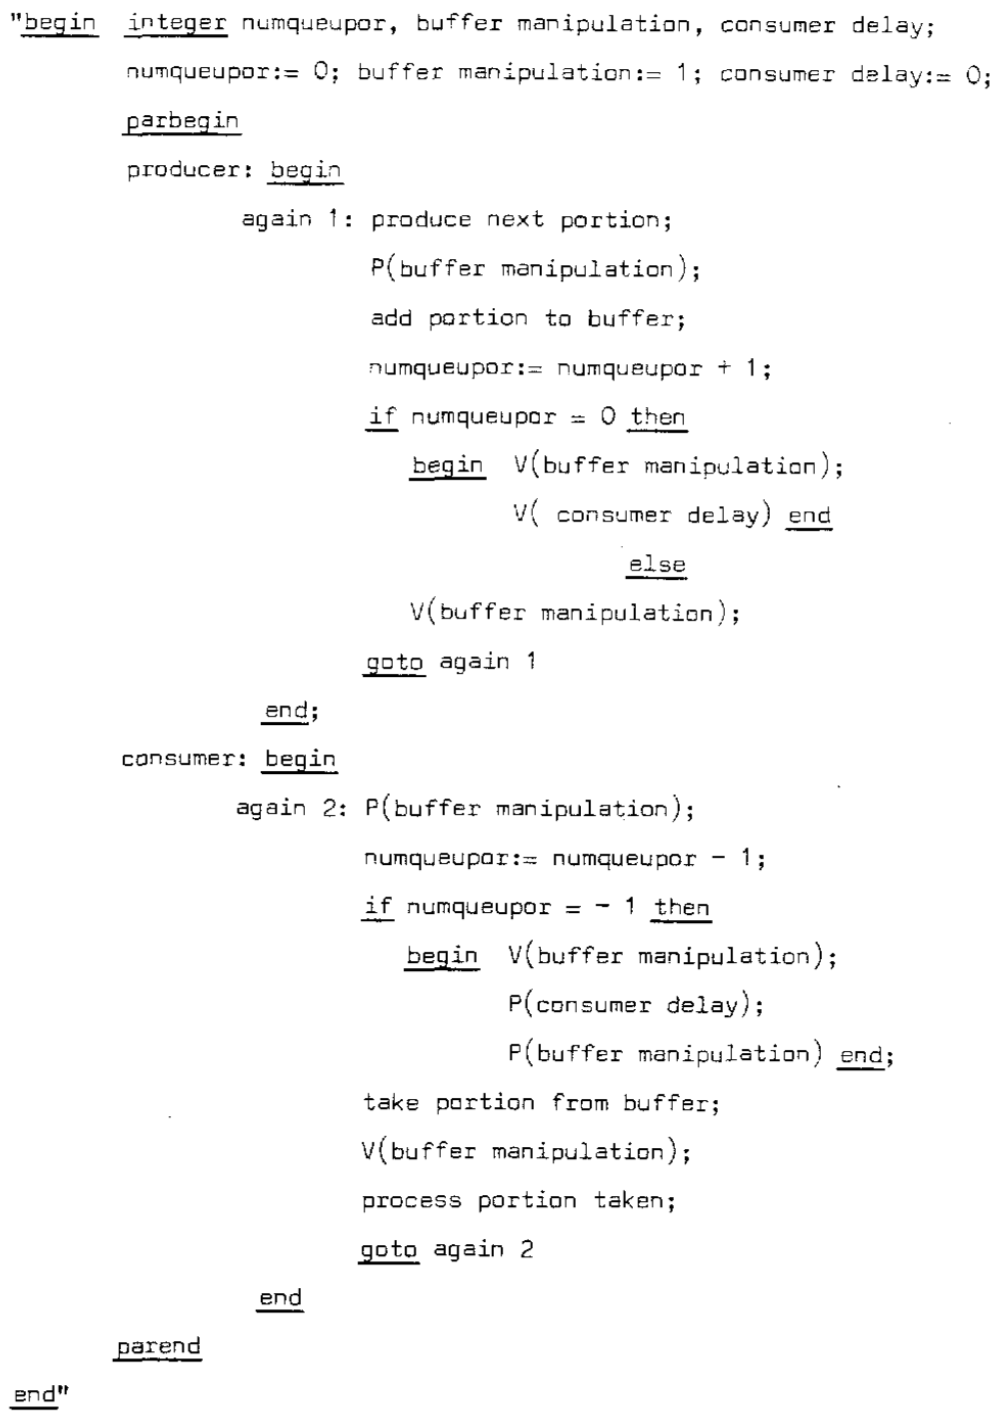
Una vez más tenemos que la manipulación del buffer nos ayuda en la exclusión mutua de secciones críticas. Ahora tenemos valor en la variable "numqueuepor" de -1, el cual ahora nos indica que el buffer no sólo está vacío, sino que ha sido detectado por Consumer que ha decidido esperar. 

Expuesto todo lo anterior concluimos que los dos programas anteriores son superfluos.